In [1]:
from sql_functions import get_dataframe
import pandas as pd

In [2]:
schema = 'hh_analytics_24_1'

sql_query = f'SELECT * FROM {schema}.weather_stacked_groupx'
weather_stacked = get_dataframe(sql_query)

In [3]:
schema = 'hh_analytics_24_1'

sql_query = f'SELECT * FROM {schema}.flights_group_x'
flights_x = get_dataframe(sql_query)

In [4]:
merged_df = weather_stacked.merge(flights_x, how='left', left_on='faa', right_on='origin')

In [5]:
# Display columns of the merged DataFrame

merged_df.columns

Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun', 'station_id', 'faa', 'flight_date', 'dep_time',
       'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time',
       'arr_delay', 'airline', 'tail_number', 'flight_number', 'origin',
       'dest', 'air_time', 'actual_elapsed_time', 'distance', 'cancelled',
       'diverted', 'lat', 'lon', 'city', 'tz_origin', 'tz_dest'],
      dtype='object')

In [6]:
merged_df[['wspd','cancelled']]

,wspd,cancelled
0,22.3,1
1,22.3,0
2,22.3,0
3,22.3,0
4,22.3,0
...,...,...
146710,11.9,0
146711,11.9,1
146712,11.9,0
146713,11.9,0


In [7]:
merged_df[['snow','cancelled']]

,snow,cancelled
0,0.0,1
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
146710,254.0,0
146711,254.0,1
146712,254.0,0
146713,254.0,0


In [8]:
merged_df[['tavg','cancelled']]

,tavg,cancelled
0,-0.9,1
1,-0.9,0
2,-0.9,0
3,-0.9,0
4,-0.9,0
...,...,...
146710,-1.3,0
146711,-1.3,1
146712,-1.3,0
146713,-1.3,0


In [9]:
merged_df[['tavg','cancelled']].describe()

,tavg,cancelled
count,146715.000000,146715.000000
mean,-0.867185,0.109089
std,1.564910,0.311752
min,-6.100000,0.000000
25%,-1.200000,0.000000
50%,-0.200000,0.000000
75%,0.300000,0.000000
max,1.300000,1.000000


In [10]:
# import the necessary libraries need for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# correlation matrix between these variables 'tavg' and 'cancelled'
corr_columns=["tavg","wspd","snow", "cancelled"]
corr_mtrx=merged_df[corr_columns].corr()
corr_mtrx

,tavg,wspd,snow,cancelled
tavg,1.000000,-0.214466,-0.202288,-0.029708
wspd,-0.214466,1.000000,0.090852,-0.043061
snow,-0.202288,0.090852,1.000000,0.064600
cancelled,-0.029708,-0.043061,0.064600,1.000000


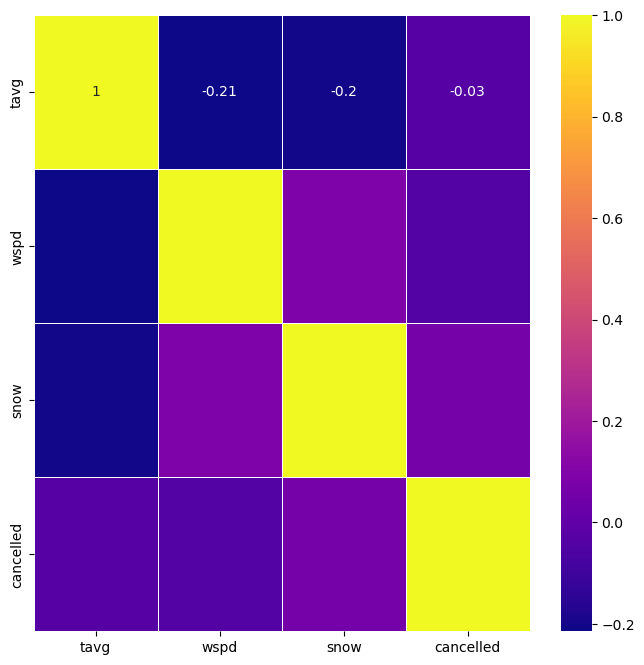

In [16]:
# draw the heatmap 
plt.figure(figsize = (8,8))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='plasma')

In [13]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri